In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pycountry
from countryinfo import CountryInfo as CInfo # Se conecta con la informacion de cada país
import matplotlib.pyplot as plt
import  altair  as  alt # Graficos de promedios
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data2 = pd.read_csv("../output/data/languages_panel_top20_ds.csv")
data2

,Unnamed: 0,iso2_code,language,year_quarter,unique_id,num_pushers,language_type,year,quarter,gpt_available,population,num_pushers_pc,post_CI,post_gpt,Treatment
0,0,AE,JavaScript,2020-Q1,AE-JavaScript,1734,programming,2020,1,1,9446000,18.356976,0,0,0
1,1,AE,JavaScript,2020-Q2,AE-JavaScript,2299,programming,2020,2,1,9446000,24.338344,0,0,0
2,2,AE,JavaScript,2020-Q3,AE-JavaScript,2366,programming,2020,3,1,9446000,25.047639,0,0,0
3,3,AE,JavaScript,2020-Q4,AE-JavaScript,2468,programming,2020,4,1,9446000,26.127461,0,0,0
4,4,AE,JavaScript,2021-Q1,AE-JavaScript,2544,programming,2021,5,1,9446000,26.932035,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48635,48635,LS,SQL,2022-Q4,LS-SQL,0,NaN,2022,12,1,2098000,0.000000,0,1,1
48636,48636,LS,SQL,2023-Q1,LS-SQL,0,NaN,2023,13,1,2098000,0.000000,1,1,1
48637,48637,LS,SQL,2023-Q2,LS-SQL,0,NaN,2023,14,1,2098000,0.000000,1,1,1
48638,48638,LS,SQL,2023-Q3,LS-SQL,0,NaN,2023,15,1,2098000,0.000000,1,1,1


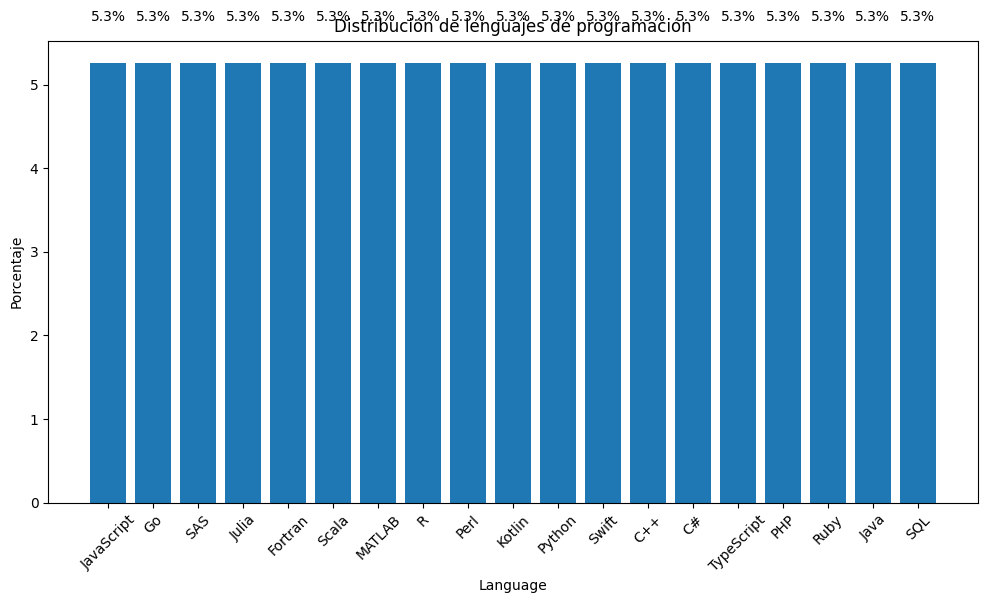

In [4]:
# Suponiendo que tienes un DataFrame llamado 'data' con la columna 'language'
distribucion_porcentual = data2['language'].value_counts(normalize=True) * 100

# Ancho de barras
bar_width = 0.8

# Índice de barras
index = distribucion_porcentual.index

# Gráfico
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(index, distribucion_porcentual.values, width=bar_width)

# Etiquetas de porcentaje
for i, v in enumerate(distribucion_porcentual.values):
    ax.text(i, v + 0.5, f"{v:.1f}%", ha='center')

plt.xlabel('Language')
plt.ylabel('Porcentaje')
plt.title('Distribución de lenguajes de programación')
plt.xticks(rotation=45)
plt.show()

In [5]:
data_gpt = data2[data2["gpt_available"] == 1]

In [6]:
# data4 = data3.groupby(['language', 'year', 'quarter', 'time']).agg({'num_pushers': 'sum'}).reset_index()
# data4

data4 = data_gpt.groupby(['language', 'year', 'quarter', 'year_quarter']).agg({'num_pushers_pc': 'mean'}).reset_index()
# Grafico de líneas con puntos superpuestos
alt.Chart(data4, height=600, width=750).mark_line(point=True, color='darkblue').encode(
    y='num_pushers_pc',
    x='year_quarter',
    color='language',
    tooltip=['num_pushers_pc', 'year_quarter', 'language']
).interactive().properties(
    title='Number of Pushers by 100k habitants by programming language 2020-2023'
)

alt.Chart(...)

In [7]:
# data5 = data3.groupby(['language', 'year', 'quarter', 'time']).agg({'num_pushers': 'sum'}).reset_index()
# data5
data_nogpt = data2[(data2["gpt_available"] == 0) & (data2["iso2_code"] != "CN") 
                   & (data2["iso2_code"] != "RU")]

data5 = data_nogpt.groupby(['language', 'year', 'quarter', 'year_quarter']).agg({'num_pushers_pc': 'mean'}).reset_index()
# Grafico de líneas con puntos superpuestos
alt.Chart(data5, height=600, width=750).mark_line(point=True, color='darkblue').encode(
    y='num_pushers_pc',
    x='year_quarter',
    color='language',
    tooltip=['num_pushers_pc', 'year_quarter', 'language']
).interactive().properties(
    title='Number of Pushers by 100k habitants by programming language 2020-2023'
)

alt.Chart(...)

In [8]:
# Extract unique values from the 'iso2_code' column
unique_iso2_codes = data_nogpt['iso2_code'].unique()

# Convert the array to a list
unique_iso2_codes_list = list(unique_iso2_codes)
print(unique_iso2_codes_list)

['BY', 'CD', 'CM', 'CU', 'EG', 'ET', 'HK', 'IR', 'KH', 'LA', 'MO', 'PR', 'RE', 'SD', 'SY', 'TJ', 'TR', 'UZ', 'VE', 'VN', 'ZW', 'BH', 'YE', 'AF', 'LY', 'SO', 'TM', 'BI']


In [38]:
# # data4 = data3.groupby(['language', 'year', 'quarter', 'time']).agg({'num_pushers': 'sum'}).reset_index()
# # data4

# data4 = data2[data2[""]].groupby(['language', 'year', 'quarter', 'time']).agg({'num_pushers_pc': 'mean'}).reset_index()
# # Grafico de líneas con puntos superpuestos
# alt.Chart(data4, height=600, width=750).mark_line(point=True, color='darkblue').encode(
#     y='num_pushers_pc',
#     x='time',
#     color='language',
#     tooltip=['num_pushers_pc', 'time', 'language']
# ).interactive().properties(
#     title='Number of Pushes per capita by programming language 2020-2023'
# )

In [10]:
data2.language.unique()

array(['JavaScript', 'Python', 'Java', 'Ruby', 'PHP', 'TypeScript', 'C#',
       'C++', 'Swift', 'Kotlin', 'Go', 'Perl', 'R', 'MATLAB', 'Scala',
       'Fortran', 'Julia', 'SAS', 'SQL'], dtype=object)